Importing the required files

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Extracting the Independent and dependent variable from the given data

In [37]:
data_frame=pd.read_csv('Position_Salaries.csv')
X=data_frame.iloc[:,1:-1]
y=data_frame.iloc[:,-1]
print(X)
print(y)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


Checking the relationship between X and Y

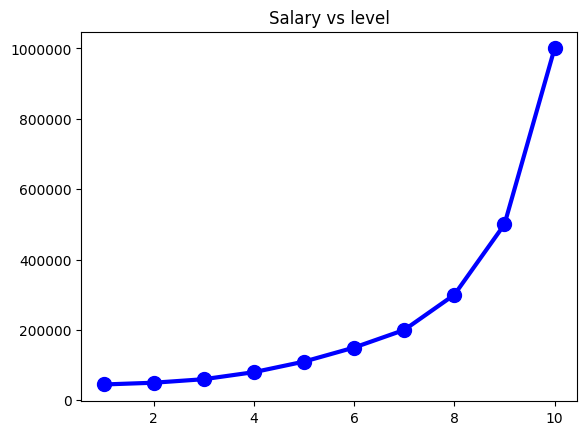

In [50]:
np.set_printoptions(suppress=True)
plt.plot(X,y,marker='o',color='blue',markersize=10,linewidth=3,label='a')
plt.title('Salary vs level')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Splitting the Values into test and training set,And applying checking the graph

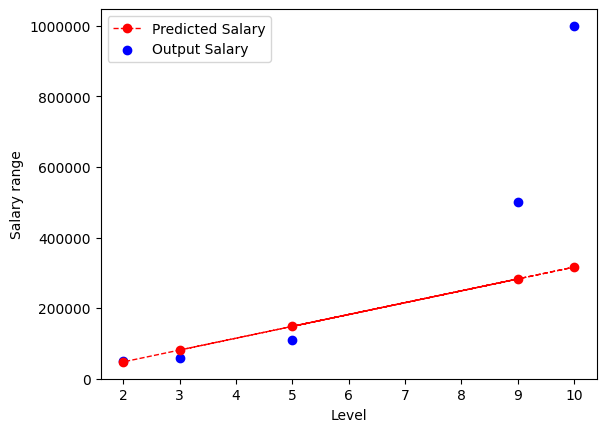

[33603.8961039]
-19740.25974025973


In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_test_predicted=regressor.predict(X_test)
plt.plot(X_test,y_test_predicted,label='Predicted Salary',color='red',marker='o',linestyle='--',linewidth=1)
plt.scatter(X_test,y_test,color='blue',label='Output Salary',marker='o')
plt.ylabel('Salary range')
plt.xlabel('Level')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()
print(regressor.coef_)
print(regressor.intercept_)


We are clearly able to see that outliers are there and are very much outside the given range, and are not scattered within the given range.

**Using the polynomial features**

In [42]:
regressor2=LinearRegression()
pf=PolynomialFeatures(degree=10)
X_poly=pf.fit_transform(X)
regressor2.fit(X_poly,y)
y_pred=regressor2.predict(X_poly)
print(regressor2.coef_)
print(regressor2.intercept_)

[      5.03524829  146820.30092902   -1306.3181473  -134291.03077412
  117468.50420978  -49347.94737604   12110.6508246    -1819.03987623
     164.59299217      -8.23590733       0.1750464 ]
-44796.68727582693


Visualising the results for the new regressor fit

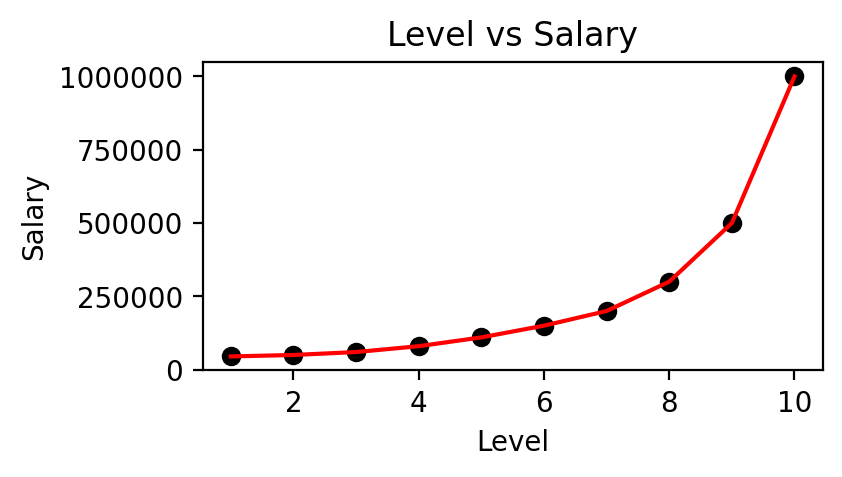

In [43]:
plt.figure(figsize=(4,2),dpi=200)
plt.plot(X,y_pred,color='red')
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.scatter(X,y,color='black')
plt.ticklabel_format(style='plain')
plt.show()

Predicted the salary corresponding to a given level

In [44]:
salary=regressor2.predict(pf.fit_transform(pd.DataFrame({'Level':[3,4,7.5]})))
print(salary)

[ 59999.99951414  79999.99966601 239833.01223212]
